# Descubra as melhores notas de matemática do ENEM 2016

Você deverá criar um modelo para prever a nota da prova de matemática de quem participou do ENEM 2016. Para isso, usará Python, Pandas, Sklearn e Regression.

### Detalhes
O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. Qualquer dúvida a respeito das colunas, consulte o <a href="https://s3-us-west-1.amazonaws.com/acceleration-assets-highway/data-science/dicionario-de-dados.zip">Dicionário dos Microdados do Enem 2016</a>.

No arquivo test.csv crie um modelo para prever nota da prova de matemática (coluna NU_NOTA_MT) de quem participou do ENEM 2016.

Salve sua resposta em um arquivo chamado answer.csv com duas colunas: NU_INSCRICAO e NU_NOTA_MT.

## Importando as bibliotecas

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate 


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

## Importando Dataset de treino e teste

In [68]:
filePath = r"C:\Users\MVI_R\OneDrive\Documentos\VSCode\Codenation_Projects\Semana_8\train.csv"
dftrain = pd.read_csv(filePath, delimiter=",", encoding="UTF8")

filePath = r"C:\Users\MVI_R\OneDrive\Documentos\VSCode\Codenation_Projects\Semana_8\test.csv"
dftest = pd.read_csv(filePath, delimiter=",", encoding="UTF8")

## Data Wrangling

In [69]:
# Seleciona apenas colunas de treino que estão disponíveis no teste
columnsdftest = list(dftest.columns)
columnsdftest.append('NU_NOTA_MT')
dftrain = dftrain[columnsdftest]

# Preparada Dataset de resultado
dfresult = pd.DataFrame()
dfresult['NU_INSCRICAO'] = dftest['NU_INSCRICAO']

## EDA Level 1

<ol>
<li>Colunas que possuem o prefixo "IN" são binárias.</li>
<li>Coluna IN_CEGUEIRA não tem valor diferente de 0.</li>
<li>Colunas SG_UF_Residencia,TP_Sexo são categoricas.</li>
<li>Colunas Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047 são do categorias, referente a notas de A a H.</li>
<li>Coluna NU_Incricao é o identificador, do tipo alfanumérico.</li>
<li>Colunas com prefixo CO são códigos alfanuméricos.</li>
</ol>

In [65]:
dftrain.shape

(13730, 48)

In [66]:
dftrain.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047', 'NU_NOTA_MT'],
      dtype='object')

In [67]:
dftrain.dtypes

NU_INSCRICAO               object
CO_UF_RESIDENCIA            int64
SG_UF_RESIDENCIA           object
NU_IDADE                    int64
TP_SEXO                    object
TP_COR_RACA                 int64
TP_NACIONALIDADE            int64
TP_ST_CONCLUSAO             int64
TP_ANO_CONCLUIU             int64
TP_ESCOLA                   int64
TP_ENSINO                 float64
IN_TREINEIRO                int64
TP_DEPENDENCIA_ADM_ESC    float64
IN_BAIXA_VISAO              int64
IN_CEGUEIRA                 int64
IN_SURDEZ                   int64
IN_DISLEXIA                 int64
IN_DISCALCULIA              int64
IN_SABATISTA                int64
IN_GESTANTE                 int64
IN_IDOSO                    int64
TP_PRESENCA_CN              int64
TP_PRESENCA_CH              int64
TP_PRESENCA_LC              int64
CO_PROVA_CN                object
CO_PROVA_CH                object
CO_PROVA_LC                object
CO_PROVA_MT                object
NU_NOTA_CN                float64
NU_NOTA_CH    

In [68]:
dftrain.describe()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,NU_NOTA_MT
count,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,4282.000000,13730.000000,4282.000000,13730.000000,13730.0,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,10341.000000,10341.000000,10133.000000,13730.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000
mean,30.736708,21.593809,2.185652,1.048871,1.782666,2.146176,1.353532,1.178888,0.129862,2.259692,0.001238,0.0,0.000364,0.000073,0.000073,0.009687,0.000947,0.000146,0.754479,0.754479,0.738747,473.495155,529.661087,516.472841,0.593664,1.101747,119.811704,111.915918,106.824238,113.123951,77.372446,529.048258,482.497928
std,9.862405,7.043654,1.007285,0.258895,0.880734,3.217328,0.558472,0.565490,0.336163,0.698586,0.035167,0.0,0.019080,0.008534,0.008534,0.097947,0.030757,0.012069,0.431932,0.431932,0.440162,71.093674,73.726344,68.688190,0.491167,0.700100,29.846017,33.737588,34.341349,33.480033,43.067140,154.294758,99.826323
min,11.000000,13.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,17.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,419.900000,480.400000,468.100000,0.000000,1.000000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000,408.900000
50%,31.000000,19.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,459.800000,532.000000,520.900000,1.000000,1.000000,120.000000,120.000000,120.000000,120.000000,80.000000,540.000000,461.200000
75%,35.000000,23.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,514.500000,581.200000,564.900000,1.000000,1.000000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000,537.600000
max,53.000000,67.000000,5.000000,4.000000,4.000000,10.000000,4.000000,3.000000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,806.400000,807.000000,763.600000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000,952.000000


In [60]:
dftrain.head(5)

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,A,C,H,A,399.4
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,NaN,A,459.8
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,C,A,A,A,NaN,A,NaN
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,E,C,B,C,F,D,NaN
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,D,C,A,A,B,F,A,NaN


## Data Quality 

In [60]:
dftrain.isna().sum()

NU_INSCRICAO                 0
CO_UF_RESIDENCIA             0
SG_UF_RESIDENCIA             0
NU_IDADE                     0
TP_SEXO                      0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 3096
IN_TREINEIRO                 0
TP_DEPENDENCIA_ADM_ESC    3096
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
CO_PROVA_CN                  0
CO_PROVA_CH                  0
CO_PROVA_LC                  0
CO_PROVA_MT                  0
NU_NOTA_CN                1134
NU_NOTA_CH                1134
NU_NOTA_LC                1199
TP_LINGUA                    0
TP_STATU

In [70]:
def DataQualityFunction(dataSet,features_list):
  dataSet.drop(columns=['IN_CEGUEIRA'],inplace=True)

  #Converter prefixo IN como binário
  for item in dataSet.columns:
    if item[0:3] == "IN_":
      dataSet[item] = dataSet[item].astype(bool)

  #Converter para float
  dataSet['TP_ENSINO'] = dataSet['TP_ENSINO'].astype(float)
  dataSet['TP_DEPENDENCIA_ADM_ESC'] = dataSet['TP_DEPENDENCIA_ADM_ESC'].astype(float)

  #Questões não respondidas atruido valor Z
  dataSet['Q027'].fillna('Z', inplace=True)   

  #Preenchimento das notas NA com 0
  dataSet.fillna(0, inplace=True)

  #Preenchimento das notas NA com 0
  dataSet[features_list].fillna(0, inplace=True)
  return dataSet

In [71]:
dftrain = DataQualityFunction(dftrain,['NU_NOTA_CN','NU_NOTA_LC','NU_NOTA_CH','NU_NOTA_MT','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO'])

In [72]:
dftest = DataQualityFunction(dftest,['NU_NOTA_CN','NU_NOTA_LC','NU_NOTA_CH','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO'])

## EDA Level 2

In [126]:
def EDA_Codenation (dataSet):
  sns.set(style="whitegrid")

  # the histogram of the data
  fig, ax = plt.subplots(figsize= (16, 5))
  ax = sns.distplot(dataSet.NU_NOTA_MT,ax=ax)

  # Boxplot (Seaborn)
  plt.figure(figsize=(16, 5))
  ax = sns.boxplot(x=dataSet["NU_NOTA_MT"],width=20)

  #matriz de correlação
  plt.figure(figsize=(40, 30))
  corrMatrix = dataSet.corr()
  sns.heatmap(corrMatrix, annot=True)
  plt.show()


  #subplot
  fig, ax = plt.subplots(math.ceil(len(dftrain.select_dtypes(include=['float64','int64']).columns) /3 ), 3, figsize = (40, 50))
  fig.tight_layout()
  column =0
  row =0
  for item in dftrain.select_dtypes(include=['float64','int64']).columns:
    sns.distplot(dataSet[item],ax = ax[row, column])
    column+=1
    if column == 3:
        column = 0
        row+=1

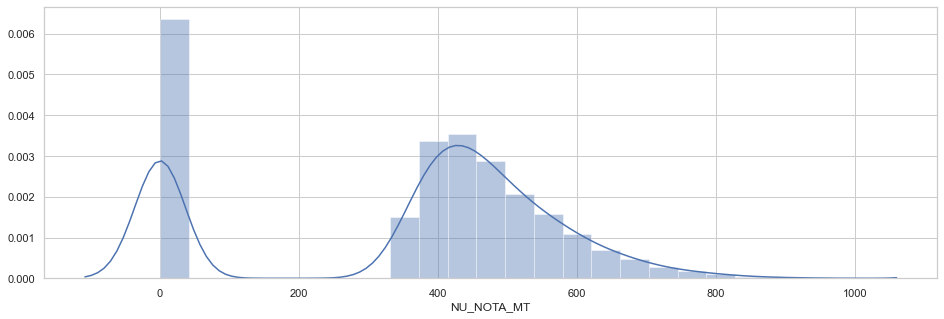

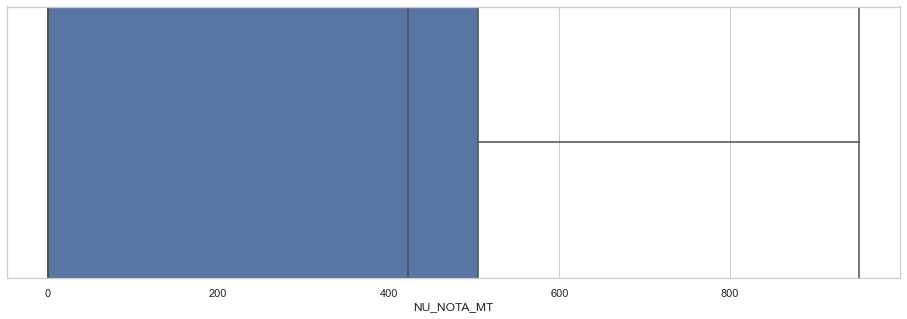

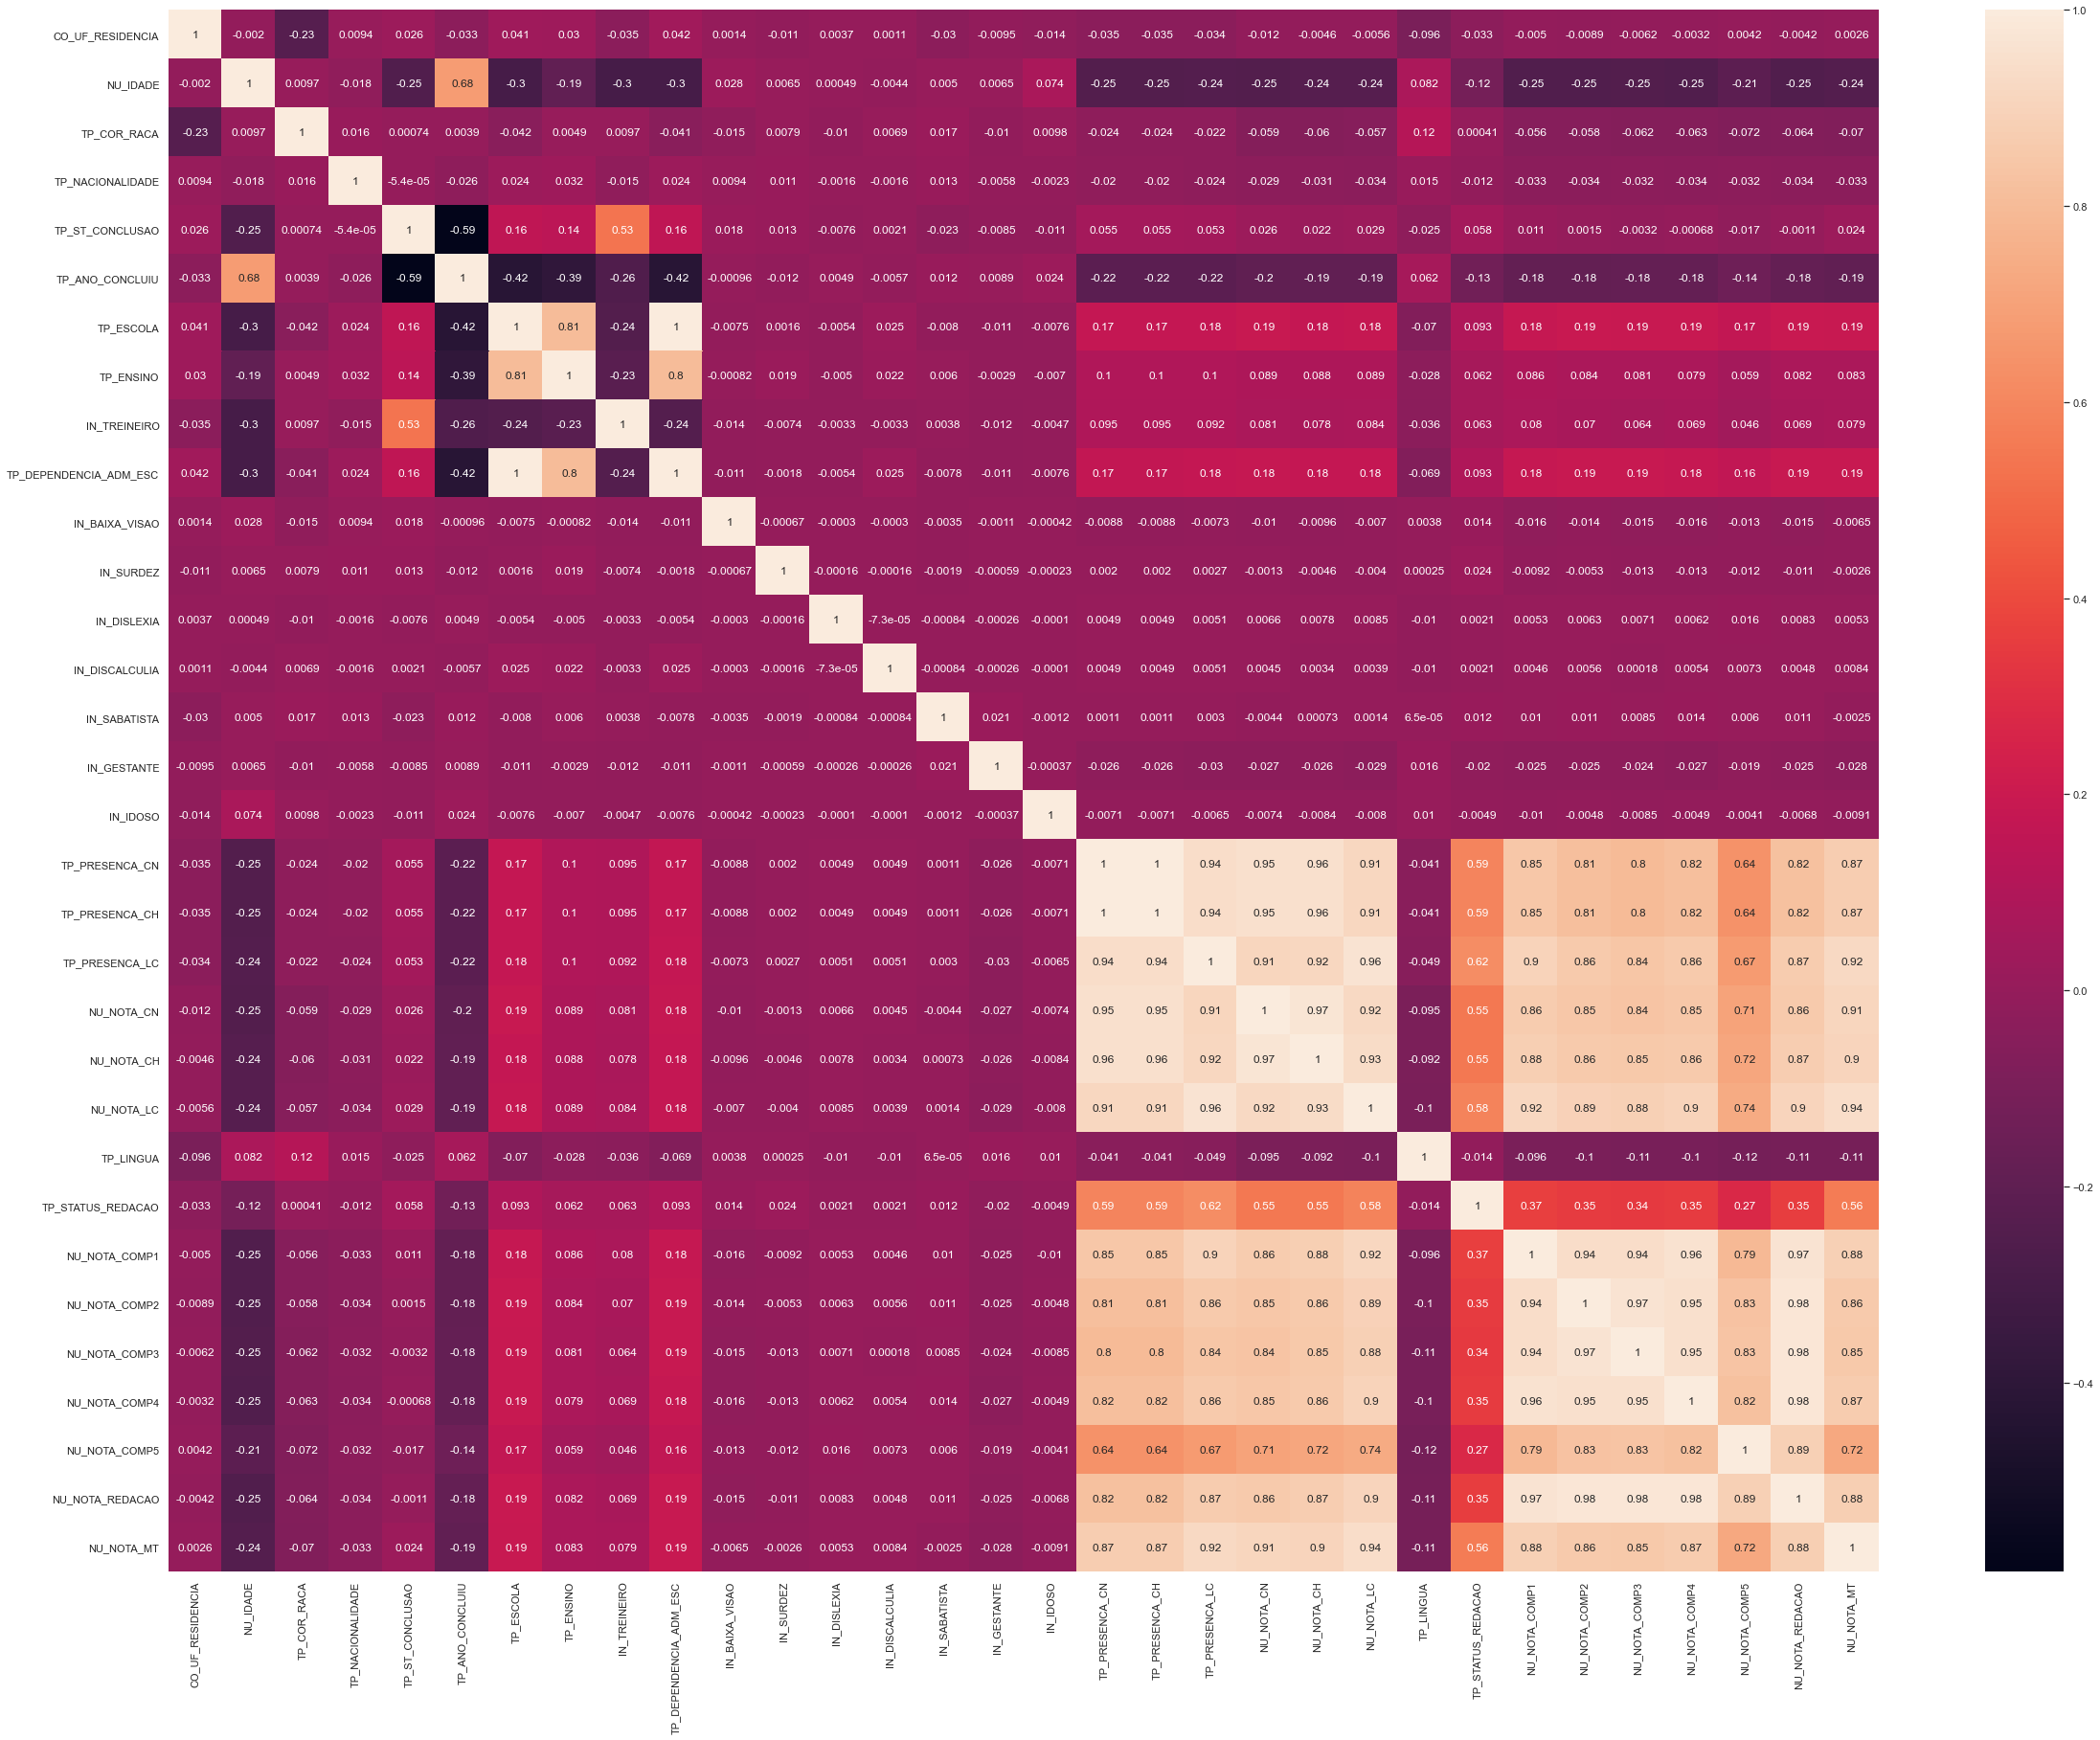

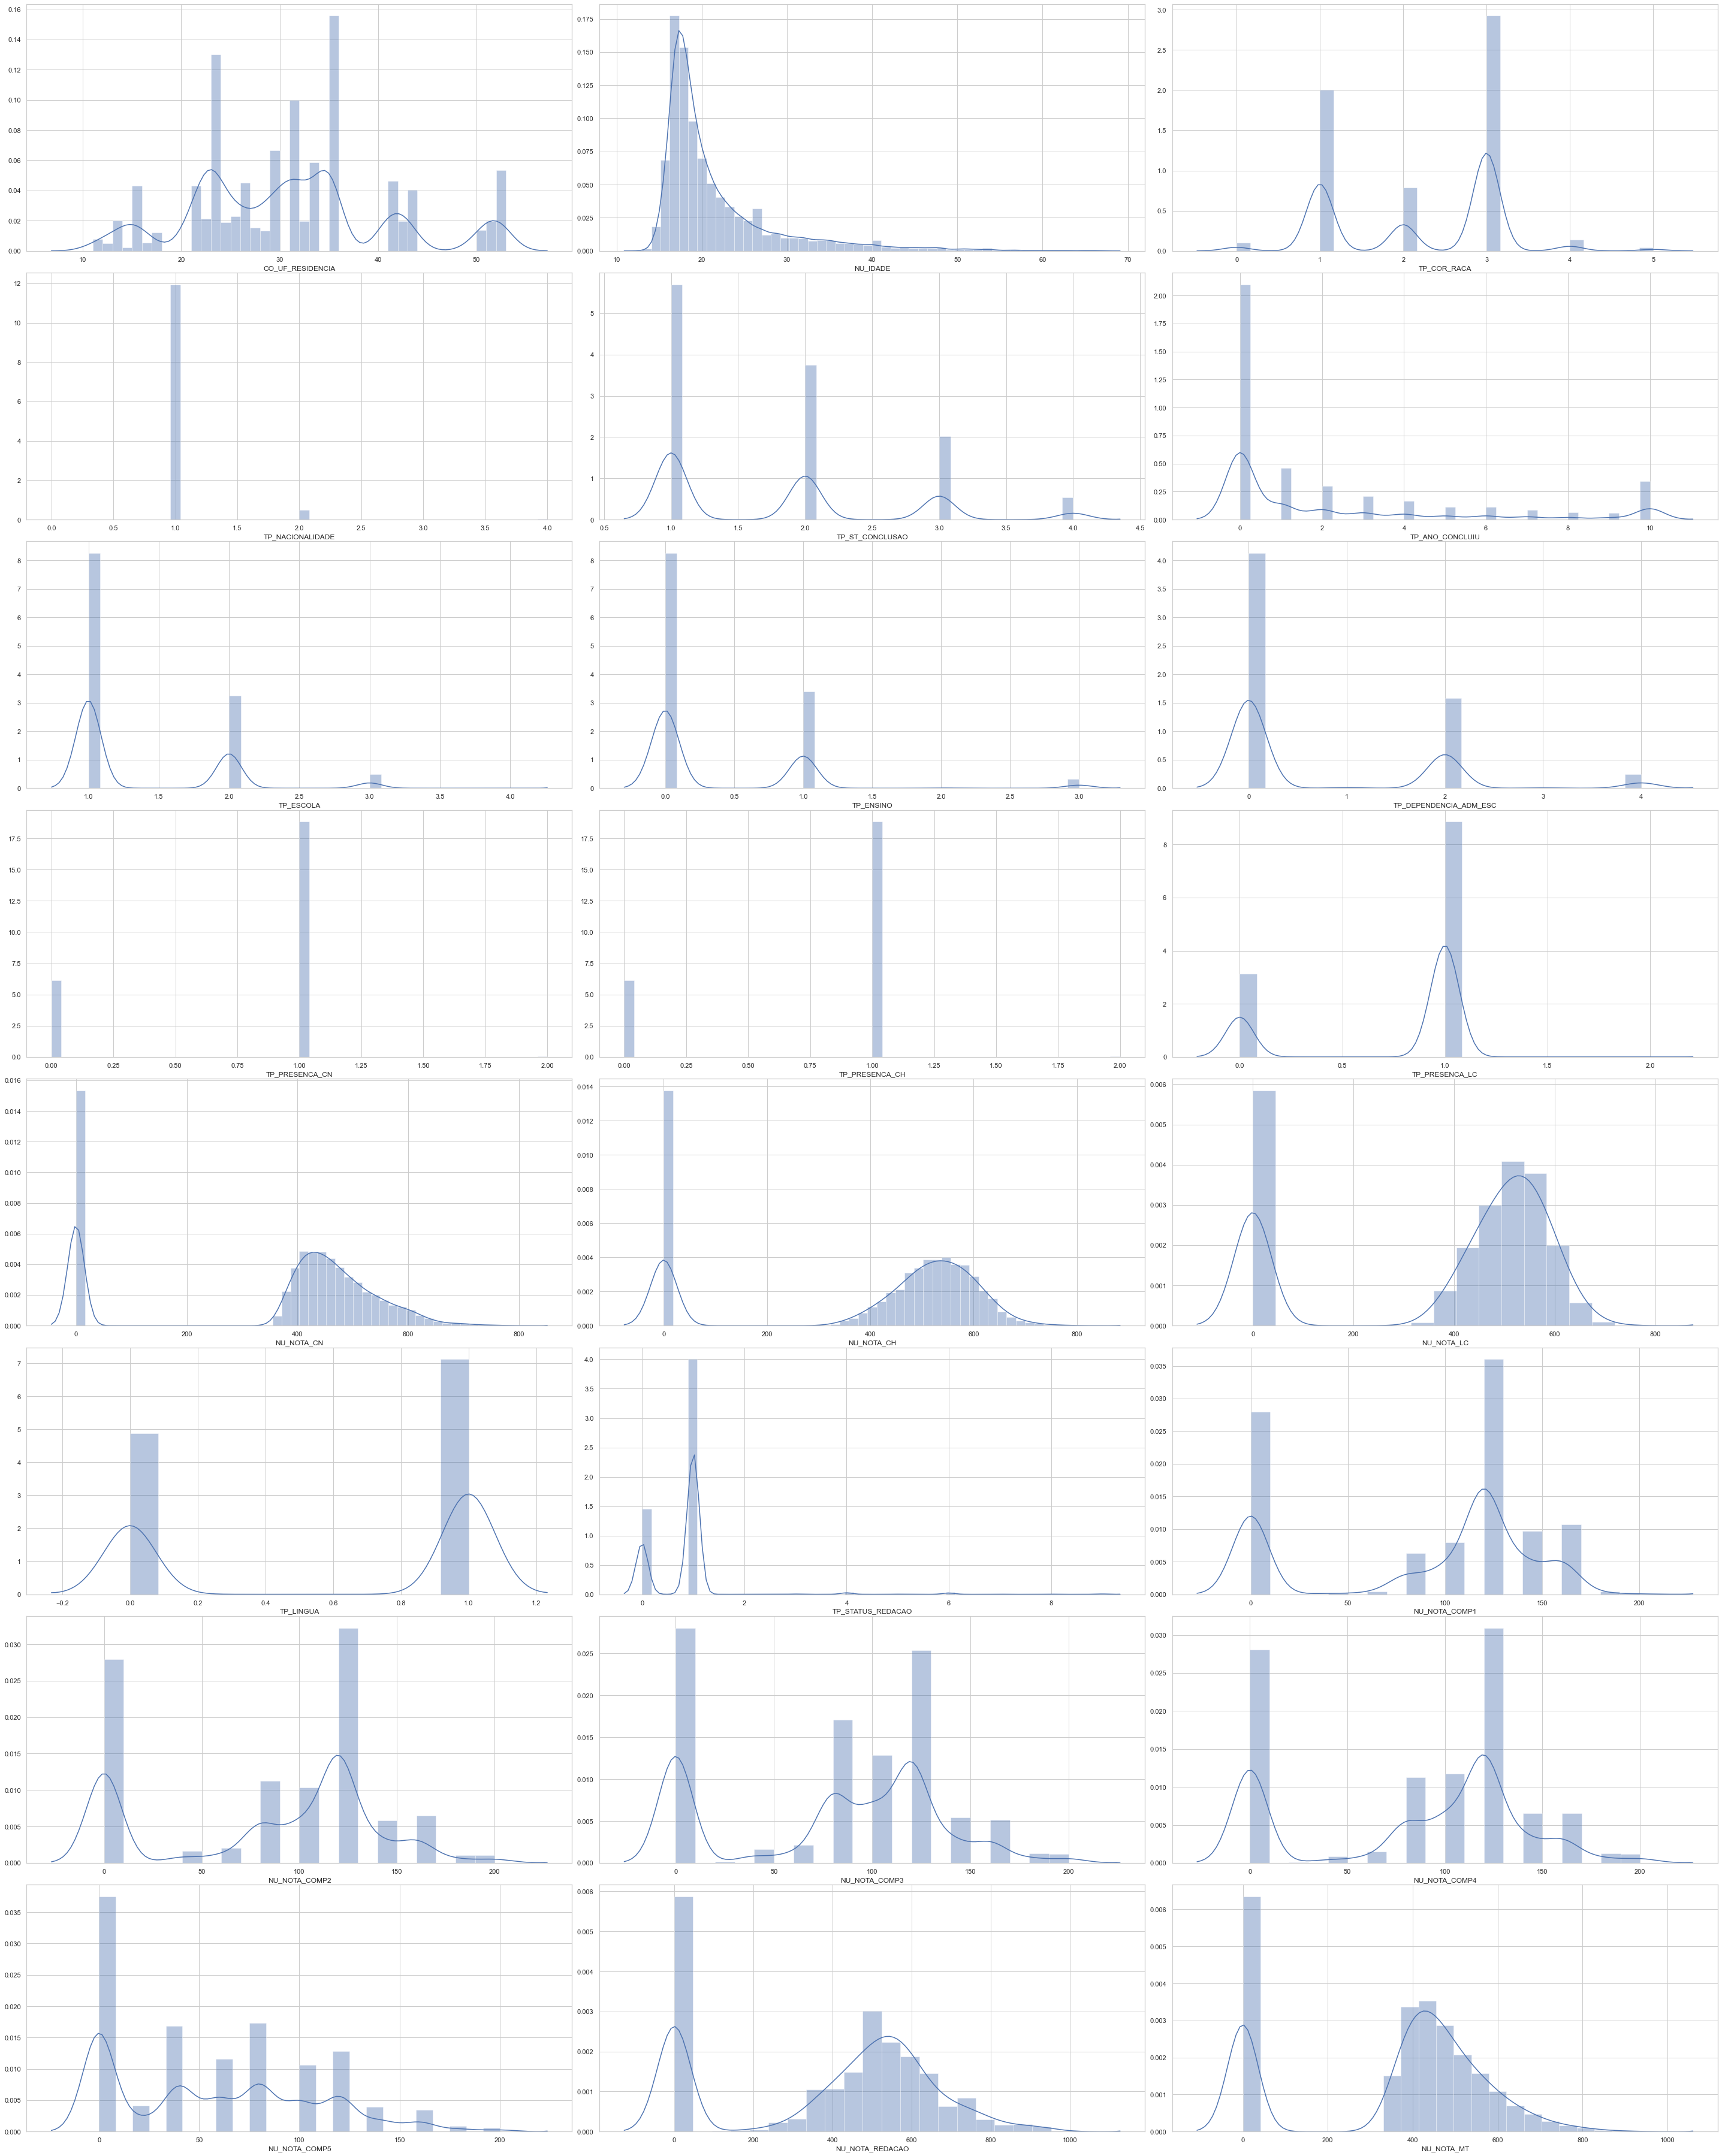

In [128]:
EDA_Codenation(dftrain)

## Feature Selection

In [102]:
featselection = ['SG_UF_RESIDENCIA','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_STATUS_REDACAO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO','Q001','Q002','Q006','Q024','Q025','Q047','NU_NOTA_MT']

In [105]:
dftrainFeatSelection = dftrain[featselection]

In [107]:
featselection = ['SG_UF_RESIDENCIA','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_STATUS_REDACAO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO','Q001','Q002','Q006','Q024','Q025','Q047']

In [109]:
dftestFeatSelection = dftest[featselection]

## Aplicando One Hot Encoder

In [74]:
def OneHotEncoderFunction(dataSet):
    enc = OneHotEncoder(handle_unknown='ignore')
    columnsList = list(dftrainFeatSelection.columns)
    columnsEncoder = [x for x in columnsList if x[0:2] == 'Q0' or x== 'SG_UF_RESIDENCIA']
    for item in columnsEncoder:
        enc_df = pd.DataFrame(enc.fit_transform(dataSet[[item]]).toarray())
        colunasRenomear = {}
        for itemEncode in enc_df.columns:
            colunasRenomear[itemEncode] = item +  str(itemEncode)
            enc_df = enc_df.rename(columns=colunasRenomear)
        dataSet = dataSet.join(enc_df)
    return dataSet[dataSet.columns.difference(columnsEncoder)]
       

In [110]:
dftrainEncoded = OneHotEncoderFunction(dftrainFeatSelection)

In [127]:
dftestEncoded = OneHotEncoderFunction(dftestFeatSelection)

## Separando dados de Treino e Teste

In [128]:
# Separando PREDITORAS de TARGET
X_preditoras = dftrainEncoded.drop('NU_NOTA_MT', axis=1, inplace=False)
Y_target = dftrainEncoded['NU_NOTA_MT']

# Separando dados de TREINO e TESTE
Xtrain, Xtest, ytrain, ytest = train_test_split(X_preditoras, Y_target)

## Normalizando Valores

In [129]:
min_max_scaler = MinMaxScaler()
Xtrain = min_max_scaler.fit_transform(Xtrain)  

## Modelo de Regressão Linear

In [130]:
#instaciar modelo
kfold = KFold(n_splits=5, random_state=21, shuffle=True)
modelLR = LinearRegression()
modelLR.fit(Xtrain, ytrain)

# Cross Validation
resultado = cross_val_score(modelLR, Xtrain, ytrain, cv = kfold , scoring='neg_mean_squared_error')

# Print do resultado
msg = "%s | Erro médio: %f       Check: (%f)" % ('LinearRegression', resultado.mean(), resultado.std())
print(msg)

LinearRegression | Erro médio: -4608.496961       Check: (297.611396)


In [131]:
Xtest = min_max_scaler.transform(dftestEncoded.values)
ypred = modelLR.predict(Xtest)
dfresult['NU_NOTA_MT'] = np.around(ypred,2)

In [133]:
dfresult.to_csv('answer.csv', index=False, header=True)